# IA PARA CIENCIA DE DATOS

## Contenido

1. Packaging
1. Read file and load data
1. ML methods
1. Metrics

## 1. Packaging

In [1]:
# Core libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)

In [53]:
# Sklearn processing
from sklearn.feature_extraction.text import TfidfVectorizer

# Sklearn classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Sklearn classification model evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Matplotlib and seaborn for charting
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

In [3]:
# Custom analysis modules
from analysis_modules import *

## 2. Read file and load data

### 2.1 Read file

In [ ]:
# Load data
data_file = "Amazon_Unlocked_Mobile.csv"
datos = pd.read_csv(data_file, header=0)

In [5]:
# View data information
describeData(datos)

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data co

### 2.2 Preprocessing

In [6]:
# --------------------
def preprocesar(dataSet=0):
    """
    Preprocess data
    """
    
    # Eliminate null values
    dataSet.dropna(inplace=True)
    # Work with a sample of 100,000 rows
    dataSet = dataSet.iloc[0:100000,:]
    
    # Encode 3s, 4s and 5s as positive
    # Encode 1s and 2s as negative

    dataSet['Positively Rated'] = [1 if x >= 3 else 0 for x in dataSet['Rating']]
    dataSet['Poorly Rated'] = [1 if x < 3 else 0 for x in dataSet['Rating']]

    # Keep only relevant columns
    columnas = ['Reviews', 'Rating', 'Positively Rated','Poorly Rated']
    dataSet = dataSet[columnas]

    return dataSet

In [36]:
# Preprocess data
misDatos = preprocesar(datos)
print(misDatos.head())
print()
print(misDatos.iloc[:,-2:].sum())
print()


                                             Reviews  Rating  \
0  I feel so LUCKY to have found this used (phone...       5   
1  nice phone, nice up grade from my pantach revu...       4   
2                                       Very pleased       5   
3  It works good but it goes slow sometimes but i...       4   
4  Great phone to replace my lost phone. The only...       4   

   Positively Rated  Poorly Rated  
0                 1             0  
1                 1             0  
2                 1             0  
3                 1             0  
4                 1             0  

Positively Rated    76490
Poorly Rated        23510
dtype: int64



### 2.3 Split Data

In [10]:
columnas = ['Reviews', 'Positively Rated','Poorly Rated']
misDatos = misDatos[columnas]
print(misDatos.columns[-2:])

Index(['Positively Rated', 'Poorly Rated'], dtype='object')


In [22]:
# Extract labels
# Convert one-hot encoding to single label
y_onehot = misDatos.iloc[:, -2:].to_numpy()
y_label = np.argmax(y_onehot, axis=1)

# Split data into training and test sets
ts_size = .25
[trainSet, testSet] = splitDataSet(misDatos, test_size=ts_size, randSplit=True, stratify=y_label)
print("Train set")
print(trainSet.head())
print()
print(trainSet.iloc[:,-2:].sum())
print()
print("Test set")
print(testSet.head())
print()
print(testSet.iloc[:,-2:].sum())
print()

Train set
                                                 Reviews  Positively Rated  \
65927  Bought it as a gift for my step daughter; she ...                 1   
74505  I upgraded to the iPhone 6 when it came out (I...                 1   
99930  Wow i remember when I first purchase this phon...                 1   
47029  Good product, I like it as expected. Thank you...                 1   
93787  el telefono tiene una falla en el conector de ...                 0   

       Poorly Rated  
65927             0  
74505             0  
99930             0  
47029             0  
93787             1  

Positively Rated    57367
Poorly Rated        17633
dtype: int64

Test set
                                                  Reviews  Positively Rated  \
86406   I HAD ORDERED FOR 9650 WITHOUT CAMERA UNLOCKED...                 0   
40776                              Battery life not great                 1   
46678   The phone came looking fine, but sometimes the...                 1 

### 2.4 Vectorizar datos

In [23]:
# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english',  ## NOTA: este se quita porque los comentarios están en español
                             min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(trainSet['Reviews'])
test_vectors = vectorizer.transform(testSet['Reviews'])

print(train_vectors)
print("\n")
print(test_vectors)

  (0, 1319)	0.25888802766593805
  (0, 3813)	0.3624123073927683
  (0, 7905)	0.515123091611221
  (0, 2316)	0.3626043851067739
  (0, 8334)	0.5271571719266916
  (0, 5072)	0.35623852270350914
  (1, 8748)	0.2175896008455874
  (1, 4584)	0.11044501816114236
  (1, 1509)	0.12238295133512442
  (1, 5567)	0.17343320392847947
  (1, 8270)	0.23992366420391065
  (1, 828)	0.14817539329524457
  (1, 4796)	0.22146944249723835
  (1, 7315)	0.11740091671366536
  (1, 9208)	0.17409328480910433
  (1, 8327)	0.17127212521648805
  (1, 6191)	0.1658400007952129
  (1, 1173)	0.14146635382156061
  (1, 6668)	0.2120096477464259
  (1, 9027)	0.23120032622678463
  (1, 3293)	0.17593499991949604
  (1, 5448)	0.14892198740412732
  (1, 2737)	0.3197208084307144
  (1, 289)	0.192406826595449
  (1, 5074)	0.2202703741871185
  :	:
  (74998, 1185)	0.13019790833844302
  (74998, 3092)	0.13905976310885565
  (74998, 7341)	0.12767821469931193
  (74998, 6038)	0.14867387217619246
  (74998, 1400)	0.13471086597804563
  (74998, 6582)	0.1190833202

## 3. ML methods

In [24]:
# Create dataframes for training and test sets
# with the target variables only
yVar = misDatos.columns[-2:]
trainModel = pd.DataFrame()
testModel = pd.DataFrame()
trainModel[yVar] = trainSet[yVar]
testModel[yVar] = testSet[yVar]
print(trainModel.head())
print()
print(testModel.head())

       Positively Rated  Poorly Rated
65927                 1             0
74505                 1             0
99930                 1             0
47029                 1             0
93787                 0             1

        Positively Rated  Poorly Rated
86406                  0             1
40776                  1             0
46678                  1             0
41431                  0             1
124066                 1             0


In [25]:
model_name = 'DT'
columnsNames = [model_name + ' Positively Rated',  model_name + ' Poorly Rated']

In [26]:
# Perform classification with DT
classifier_dt = DecisionTreeClassifier(max_depth=5)
classifier_dt.fit(train_vectors, trainSet.iloc[:,1:])

trainModel[columnsNames] = classifier_dt.predict(train_vectors)
testModel[columnsNames] = classifier_dt.predict(test_vectors)
print(testModel)


        Positively Rated  Poorly Rated  DT Positively Rated  DT Poorly Rated
86406                  0             1                    1                0
40776                  1             0                    1                0
46678                  1             0                    1                0
41431                  0             1                    1                0
124066                 1             0                    1                0
...                  ...           ...                  ...              ...
33565                  0             1                    1                0
44879                  1             0                    1                0
95051                  1             0                    1                0
90193                  1             0                    1                0
92973                  0             1                    0                0

[25000 rows x 4 columns]


In [27]:
model_name = 'RF'
columnsNames = [model_name + ' Positively Rated',  model_name + ' Poorly Rated']

In [28]:
# Perform the class with RF
classifier_rf = RandomForestClassifier(n_estimators=100, max_depth=5)
classifier_rf.fit(train_vectors, trainSet.iloc[:,1:])

trainModel[columnsNames] = classifier_rf.predict(train_vectors)
testModel[columnsNames] = classifier_rf.predict(test_vectors)
print(testModel)

        Positively Rated  Poorly Rated  DT Positively Rated  DT Poorly Rated  \
86406                  0             1                    1                0   
40776                  1             0                    1                0   
46678                  1             0                    1                0   
41431                  0             1                    1                0   
124066                 1             0                    1                0   
...                  ...           ...                  ...              ...   
33565                  0             1                    1                0   
44879                  1             0                    1                0   
95051                  1             0                    1                0   
90193                  1             0                    1                0   
92973                  0             1                    0                0   

        RF Positively Rated  RF Poorly 

In [29]:
model_name = 'KNN'
columnsNames = [model_name + ' Positively Rated',  model_name + ' Poorly Rated']

In [30]:
# Perform classification with KNN
classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(train_vectors, trainSet.iloc[:,1:])

trainModel[columnsNames] = classifier_knn.predict(train_vectors)
testModel[columnsNames] = classifier_knn.predict(test_vectors)
print(testModel)

        Positively Rated  Poorly Rated  DT Positively Rated  DT Poorly Rated  \
86406                  0             1                    1                0   
40776                  1             0                    1                0   
46678                  1             0                    1                0   
41431                  0             1                    1                0   
124066                 1             0                    1                0   
...                  ...           ...                  ...              ...   
33565                  0             1                    1                0   
44879                  1             0                    1                0   
95051                  1             0                    1                0   
90193                  1             0                    1                0   
92973                  0             1                    0                0   

        RF Positively Rated  RF Poorly 

## 4. Metrics

In [74]:
# Create dataframes to store model performance metrics
methodsUsed=['DT', 'RF', 'KNN']
performanceHeaders=['accuracy', 'precision', 'recall', 'f1-score']
trainModelMetrics = pd.DataFrame(index=methodsUsed, columns=performanceHeaders)
testModelMetrics = pd.DataFrame(index=methodsUsed, columns=performanceHeaders)

In [75]:
def calculateMetrics(model_name, position, yVar, trainModel, testModel, trainModelMetrics, testModelMetrics):
    columnsNames = [model_name + ' Positively Rated',  model_name + ' Poorly Rated']
    nVar = len(yVar)
    nObsTrain = len(trainModel)
    nObsTest = len(testModel)

    # create confusion matrix labels
    actual_label = ['Actual Positively Rated', 'Actual Poorly Rated']
    predicted_label = ['Predicted Positively Rated', 'Predicted Poorly Rated']

    # train confusion matrix
    train_cm = confusion_matrix(
        # change to 1D arrays of labels
        trainModel[yVar].to_numpy().argmax(axis=1),
        trainModel[columnsNames].to_numpy().argmax(axis=1)
    )
    train_cm_percent = np.round(train_cm / train_cm.sum(axis=1)[:, np.newaxis] * 100, 2)
    train_conf_matrix = pd.DataFrame(train_cm_percent, index=actual_label,
                                    columns=predicted_label)
    
    # test confusion matrix
    test_cm = confusion_matrix(
        # change to 1D arrays of labels
        testModel[yVar].to_numpy().argmax(axis=1),
        testModel[columnsNames].to_numpy().argmax(axis=1)
    )
    test_cm_percent = np.round(test_cm / test_cm.sum(axis=1)[:, np.newaxis] * 100, 2)
    test_conf_matrix = pd.DataFrame(test_cm_percent, index=actual_label,
                                    columns=predicted_label)

    print(model_name + " Metrics")
    print(model_name + " Train Confusion Matrix")
    print(train_conf_matrix)
    print()
    plt.figure(figsize=(6,4))
    sns.heatmap(train_conf_matrix, annot=True)
    plt.title(model_name + ' TRAIN CONF. MATRIX', fontweight='bold')
    plt.show()
    print()
    print(model_name + " Test Confusion Matrix")
    print(test_conf_matrix)
    print()
    plt.figure()
    sns.heatmap(test_conf_matrix, annot=True)
    plt.title(model_name + ' TEST CONF. MATRIX', fontweight='bold')
    plt.show()
    print()

    # --- Train Metrics ---
    trainModelMetrics.iloc[position, 0] = accuracy_score(trainModel[yVar].to_numpy().reshape(nObsTrain,nVar), trainModel[columnsNames].to_numpy().reshape(nObsTrain,nVar))
    trainModelMetrics.iloc[position, 1] = precision_score(trainModel[yVar].to_numpy().reshape(nObsTrain,nVar), trainModel[columnsNames].to_numpy().reshape(nObsTrain,nVar), average='macro', zero_division=0)
    trainModelMetrics.iloc[position, 2] = recall_score(trainModel[yVar].to_numpy().reshape(nObsTrain,nVar), trainModel[columnsNames].to_numpy().reshape(nObsTrain,nVar), average='macro', zero_division=0)
    trainModelMetrics.iloc[position, 3] = f1_score(trainModel[yVar].to_numpy().reshape(nObsTrain,nVar), trainModel[columnsNames].to_numpy().reshape(nObsTrain,nVar), average='macro', zero_division=0)

    # --- Test Metrics ---
    testModelMetrics.iloc[position, 0] = accuracy_score(testModel[yVar].to_numpy().reshape(nObsTest,nVar), testModel[columnsNames].to_numpy().reshape(nObsTest,nVar))
    testModelMetrics.iloc[position, 1] = precision_score(testModel[yVar].to_numpy().reshape(nObsTest,nVar), testModel[columnsNames].to_numpy().reshape(nObsTest,nVar), average='macro', zero_division=0)
    testModelMetrics.iloc[position, 2] = recall_score(testModel[yVar].to_numpy().reshape(nObsTest,nVar), testModel[columnsNames].to_numpy().reshape(nObsTest,nVar), average='macro', zero_division=0)
    testModelMetrics.iloc[position, 3] = f1_score(testModel[yVar].to_numpy().reshape(nObsTest,nVar), testModel[columnsNames].to_numpy().reshape(nObsTest,nVar), average='macro', zero_division=0)

    return trainModelMetrics, testModelMetrics

DT Metrics
DT Train Confusion Matrix
                         Predicted Positively Rated  Predicted Poorly Rated
Actual Positively Rated                       97.93                    2.07
Actual Poorly Rated                           79.98                   20.02



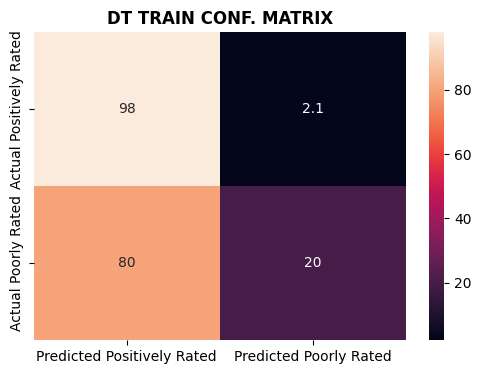


DT Test Confusion Matrix
                         Predicted Positively Rated  Predicted Poorly Rated
Actual Positively Rated                       98.03                    1.97
Actual Poorly Rated                           81.73                   18.27



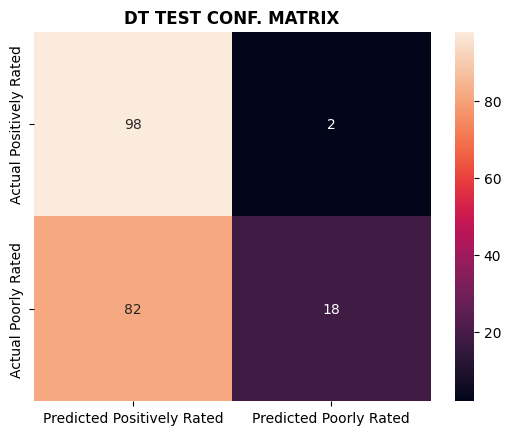


RF Metrics
RF Train Confusion Matrix
                         Predicted Positively Rated  Predicted Poorly Rated
Actual Positively Rated                      100.00                    0.00
Actual Poorly Rated                           99.98                    0.02



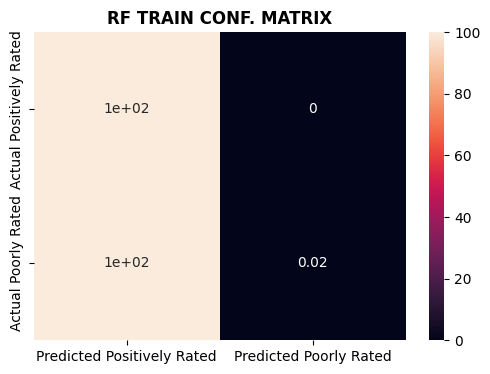


RF Test Confusion Matrix
                         Predicted Positively Rated  Predicted Poorly Rated
Actual Positively Rated                      100.00                    0.00
Actual Poorly Rated                           99.97                    0.03



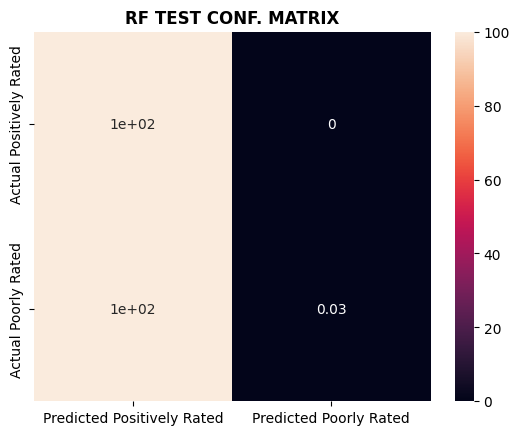


KNN Metrics
KNN Train Confusion Matrix
                         Predicted Positively Rated  Predicted Poorly Rated
Actual Positively Rated                       99.33                    0.67
Actual Poorly Rated                           32.09                   67.91



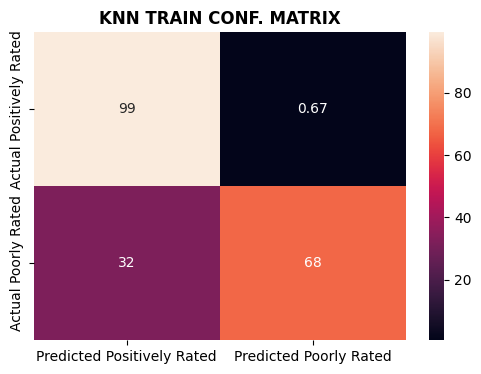


KNN Test Confusion Matrix
                         Predicted Positively Rated  Predicted Poorly Rated
Actual Positively Rated                       99.04                    0.96
Actual Poorly Rated                           41.57                   58.43



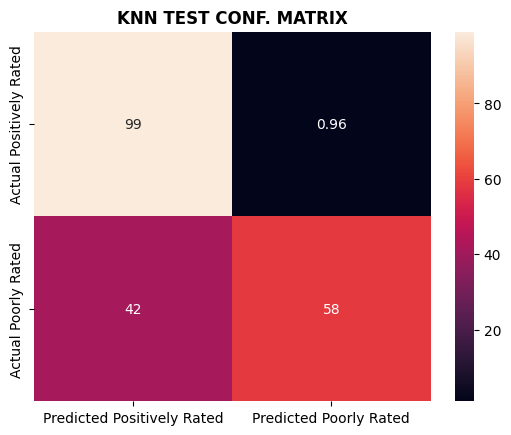

In [76]:
# DT metrics
model_name = 'DT'
position = 0  # Position for DT in the results DataFrame
trainModelMetrics, testModelMetrics = calculateMetrics(model_name, position, yVar, trainModel, testModel, trainModelMetrics, testModelMetrics)

# RF metrics
model_name = 'RF'
position = 1  # Position for RF in the results DataFrame
trainModelMetrics, testModelMetrics = calculateMetrics(model_name, position, yVar, trainModel, testModel, trainModelMetrics, testModelMetrics)

# KNN metrics
model_name = 'KNN'
position = 2  # Position for KNN in the results DataFrame
trainModelMetrics, testModelMetrics = calculateMetrics(model_name, position, yVar, trainModel, testModel, trainModelMetrics, testModelMetrics)

In [80]:
print("=======================================================================")
print("                      MODEL PERFORMANCE COMPARISON")
print("-----------------------------------------------------------------------")
print("                      Training")
print("-----------------------------------------------------------------------")
print(trainModelMetrics)
print("-----------------------------------------------------------------------")
print("                      Testing")
print("-----------------------------------------------------------------------")
print(testModelMetrics)
print("\n")

                      MODEL PERFORMANCE COMPARISON
-----------------------------------------------------------------------
                      Training
-----------------------------------------------------------------------
     accuracy precision    recall  f1-score
DT   0.795813  0.774121  0.589542   0.59805
RF   0.764947  0.882467  0.500113  0.433633
KNN   0.91944  0.939334  0.836196  0.874094
-----------------------------------------------------------------------
                      Testing
-----------------------------------------------------------------------
    accuracy precision    recall  f1-score
DT   0.79244  0.768445  0.581281  0.585839
RF     0.765  0.882491   0.50017  0.433762
KNN  0.89496  0.917578  0.787371  0.829287


